In [1]:
import snapatac2 as snap
import numpy as np 
import pandas as pd
import scanpy as sc

from collections import Counter

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import os

In [2]:
sc._settings.settings._vector_friendly=True

In [3]:
%%time
adata = sc.read_h5ad("../07_final_ATAC.h5ad")
adata

CPU times: user 4.04 s, sys: 25.1 s, total: 29.2 s
Wall time: 29.2 s


AnnData object with n_obs × n_vars = 690044 × 654221
    obs: 'ATAC_barcode', 'sample_id', 'leiden', 'donor_id', 'study', 'age_status', 'age', 'sex', 'region', 'disease_binary', 'technology', 'fragment_file', 'full_path', 'file', 'nfrag', 'tsse', 'cell_type', 'tech_plus_study', 'age_group', 'decade', 'final_cell_type', 'cell_or_nuclei', 'disease'
    var: 'count', 'selected'
    uns: 'age_status_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'neighbors', 'spectral_eigenvalue', 'study_colors'
    obsm: 'X_spectral', 'X_spectral_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
# save the cell level metadata
adata_metadata = adata.obs
adata_metadata.to_csv("01_ATAC_cell_level_metadata.csv")

In [5]:
adata.obs.columns

Index(['ATAC_barcode', 'sample_id', 'leiden', 'donor_id', 'study',
       'age_status', 'age', 'sex', 'region', 'disease_binary', 'technology',
       'fragment_file', 'full_path', 'file', 'nfrag', 'tsse', 'cell_type',
       'tech_plus_study', 'age_group', 'decade', 'final_cell_type',
       'cell_or_nuclei', 'disease'],
      dtype='object')

In [6]:
adata.obs.technology

ENCSR556UHL:AAAGGATTCATTCTCA    Multiome-v1
ENCSR556UHL:GTAATCGCATTACCTT    Multiome-v1
ENCSR556UHL:TACGGATAGGAGACTC    Multiome-v1
ENCSR556UHL:TCAAGACTCACGTGTA    Multiome-v1
ENCSR913OAS:AAACTCGAGCGAATAT    Multiome-v1
                                   ...     
ENCSR288RQI:TTTGAGGCATTCGTCC    Multiome-v1
ENCSR288RQI:TTTGCGCGTTACCACA    Multiome-v1
ENCSR288RQI:TTTGCGCTCCAATCCC    Multiome-v1
ENCSR288RQI:TTTGGCCGTCAAACAA    Multiome-v1
ENCSR288RQI:TTTGGCCTCTTGTCGC    Multiome-v1
Name: technology, Length: 690044, dtype: category
Categories (2, object): ['10X_ATAC', 'Multiome-v1']

In [7]:
plots_dir = "../../../paper_figures/"
os.makedirs(plots_dir, exist_ok=True)

2025-02-12 21:38:34 - INFO - maxp pruned
2025-02-12 21:38:34 - INFO - cmap pruned
2025-02-12 21:38:34 - INFO - kern dropped
2025-02-12 21:38:34 - INFO - post pruned
2025-02-12 21:38:34 - INFO - FFTM dropped
2025-02-12 21:38:34 - INFO - GPOS pruned
2025-02-12 21:38:34 - INFO - GSUB pruned
2025-02-12 21:38:34 - INFO - glyf pruned
2025-02-12 21:38:34 - INFO - Added gid0 to subset
2025-02-12 21:38:34 - INFO - Added first four glyphs to subset
2025-02-12 21:38:34 - INFO - Closing glyph list over 'GSUB': 31 glyphs before
2025-02-12 21:38:34 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'F', 'L', 'M', 'N', 'P', 'S', 'a', 'b', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'r', 's', 'space', 't', 'u', 'v', 'y']
2025-02-12 21:38:34 - INFO - Glyph IDs:   [0, 1, 2, 3, 36, 38, 40, 41, 47, 48, 49, 51, 54, 68, 69, 70, 71, 72, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92]
2025-02-12 21:38:34 - INFO - Closed glyph list over 'GSUB': 31 glyphs after
2025-02-12 21

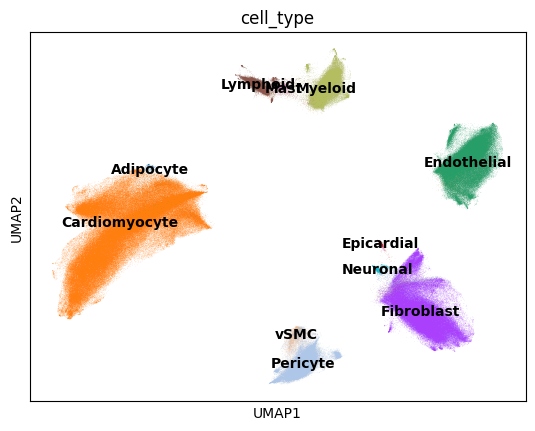

CPU times: user 8.27 s, sys: 680 ms, total: 8.94 s
Wall time: 8.53 s


In [8]:
%%time
with plt.rc_context():
    sc.pl.umap(adata, color = "cell_type", legend_loc = "on data", show = False)
    plt.savefig(plots_dir + "snATAC_UMAP.pdf", bbox_inches="tight")
    plt.show()

2025-02-12 21:40:07 - INFO - maxp pruned
2025-02-12 21:40:07 - INFO - cmap pruned
2025-02-12 21:40:07 - INFO - kern dropped
2025-02-12 21:40:07 - INFO - post pruned
2025-02-12 21:40:07 - INFO - FFTM dropped
2025-02-12 21:40:07 - INFO - GPOS pruned
2025-02-12 21:40:07 - INFO - GSUB pruned
2025-02-12 21:40:07 - INFO - glyf pruned
2025-02-12 21:40:07 - INFO - Added gid0 to subset
2025-02-12 21:40:07 - INFO - Added first four glyphs to subset
2025-02-12 21:40:07 - INFO - Closing glyph list over 'MATH': 34 glyphs before
2025-02-12 21:40:07 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'K', 'M', 'N', 'O', 'P', 'S', 'U', 'a', 'd', 'e', 'four', 'm', 'n', 'nonmarkingreturn', 'one', 'p', 'parenleft', 'parenright', 'r', 's', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
2025-02-12 21:40:07 - INFO - Glyph IDs:   [0, 1, 2, 3, 11, 12, 19, 20, 21, 22, 23, 36, 38, 39, 40, 46, 48, 49, 50, 51, 54, 56, 68, 71, 72, 80, 81, 83, 85, 86, 87, 88, 89, 92]
2025-02-12 21:40:07 - INFO - Cl

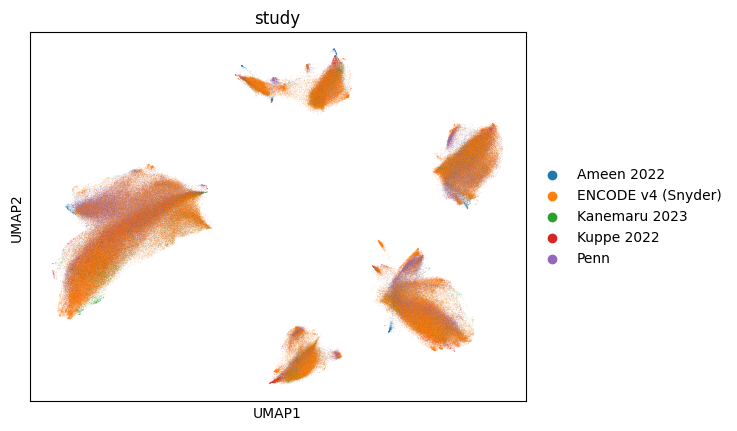

CPU times: user 7.69 s, sys: 533 ms, total: 8.22 s
Wall time: 7.85 s


In [12]:
%%time
with plt.rc_context():
    sc.pl.umap(adata, color = "study", show = False)
    plt.savefig(plots_dir + "snATAC_UMAP_by_study.pdf", bbox_inches="tight")
    plt.show()

2025-02-12 21:39:59 - INFO - maxp pruned
2025-02-12 21:39:59 - INFO - cmap pruned
2025-02-12 21:39:59 - INFO - kern dropped
2025-02-12 21:39:59 - INFO - post pruned
2025-02-12 21:39:59 - INFO - FFTM dropped
2025-02-12 21:39:59 - INFO - GPOS pruned
2025-02-12 21:39:59 - INFO - GSUB pruned
2025-02-12 21:39:59 - INFO - glyf pruned
2025-02-12 21:39:59 - INFO - Added gid0 to subset
2025-02-12 21:39:59 - INFO - Added first four glyphs to subset
2025-02-12 21:39:59 - INFO - Closing glyph list over 'MATH': 29 glyphs before
2025-02-12 21:39:59 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'M', 'P', 'T', 'U', 'X', 'c', 'e', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'space', 't', 'two', 'u', 'underscore', 'v', 'y', 'zero']
2025-02-12 21:39:59 - INFO - Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 36, 38, 48, 51, 55, 56, 59, 66, 70, 72, 74, 75, 76, 79, 80, 81, 82, 87, 88, 89, 92]
2025-02-12 21:39:59 - INFO - Closed glyph list over 'MATH': 29 glyphs after
2025-02-12

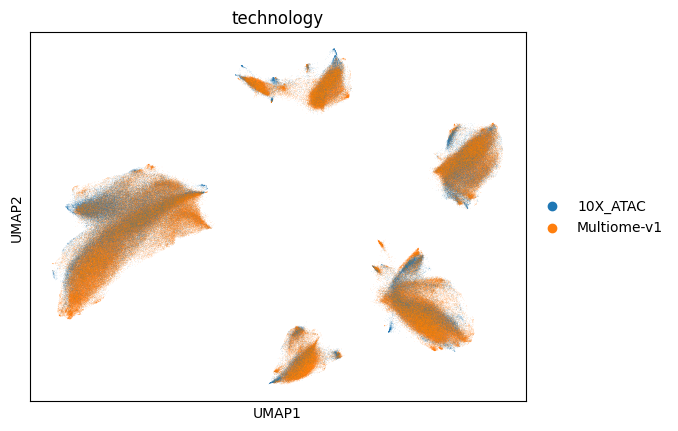

CPU times: user 8.14 s, sys: 567 ms, total: 8.71 s
Wall time: 8.33 s


In [11]:
%%time
with plt.rc_context():
    sc.pl.umap(adata, color = "technology", show = False)
    plt.savefig(plots_dir + "snATAC_UMAP_by_technology.pdf", bbox_inches="tight")
    plt.show()

### Produce donor-level metadata plots

In [8]:
adata.obs.columns

Index(['ATAC_barcode', 'sample_id', 'leiden', 'donor_id', 'study',
       'age_status', 'age', 'sex', 'region', 'disease_binary', 'technology',
       'fragment_file', 'full_path', 'file', 'nfrag', 'tsse', 'cell_type',
       'tech_plus_study', 'age_group', 'decade', 'final_cell_type',
       'cell_or_nuclei', 'disease'],
      dtype='object')

In [9]:
# use donor_id rather than sample_id, since some donors have multiple sample_ids associated with them
donor_level_metadata = adata.obs[["age", "age_status", "sex", "study", "technology",
                                  "tech_plus_study", "donor_id", "age_group", 
                                  "disease_binary"]].drop_duplicates().reset_index(drop = True)

donor_level_metadata

,age,age_status,sex,study,technology,tech_plus_study,donor_id,age_group,disease_binary
0,61.0,postnatal,male,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR556UHL,old,N
1,66.0,postnatal,male,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR913OAS,old,N
2,32.0,postnatal,female,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR455MGH,young,N
3,69.0,postnatal,male,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR080TZR,old,N
4,67.0,postnatal,male,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR008CVR,old,N
...,...,...,...,...,...,...,...,...,...
101,53.0,postnatal,female,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR540DHJ,middle,N
102,66.0,postnatal,male,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR489URW,old,N
103,50.0,postnatal,male,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCSR056QLB,middle,N
104,15.0,fetal,female,ENCODE v4 (Snyder),Multiome-v1,Multiome-v1_ENCODE v4 (Snyder),ENCODE v4 (Snyder):ENCFF775ANN,fetal,N


### Produce metadata plots

In [10]:
Counter(donor_level_metadata.age_group)

Counter({'middle': 44, 'old': 31, 'fetal': 17, 'young': 14})

In [11]:
Counter(donor_level_metadata.age_status)

Counter({'postnatal': 89, 'fetal': 17})

In [12]:
Counter(donor_level_metadata.study)

Counter({'ENCODE v4 (Snyder)': 71,
         'Kuppe 2022': 17,
         'Penn': 11,
         'Kanemaru 2023': 4,
         'Ameen 2022': 3})

In [13]:
Counter(donor_level_metadata.technology)

Counter({'Multiome-v1': 75, '10X_ATAC': 31})

In [14]:
Counter(donor_level_metadata.tech_plus_study)

Counter({'Multiome-v1_ENCODE v4 (Snyder)': 71,
         '10X_ATAC_Kuppe 2022': 17,
         '10X_ATAC_Penn': 11,
         'Multiome-v1_Kanemaru 2023': 4,
         '10X_ATAC_Ameen 2022': 3})

2025-01-06 22:35:04 - INFO - maxp pruned
2025-01-06 22:35:04 - INFO - cmap pruned
2025-01-06 22:35:04 - INFO - kern dropped
2025-01-06 22:35:04 - INFO - post pruned
2025-01-06 22:35:04 - INFO - FFTM dropped
2025-01-06 22:35:04 - INFO - GPOS pruned
2025-01-06 22:35:04 - INFO - GSUB pruned
2025-01-06 22:35:04 - INFO - glyf pruned
2025-01-06 22:35:04 - INFO - Added gid0 to subset
2025-01-06 22:35:04 - INFO - Added first four glyphs to subset
2025-01-06 22:35:04 - INFO - Closing glyph list over 'MATH': 40 glyphs before
2025-01-06 22:35:04 - INFO - Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'K', 'N', 'O', 'P', 'S', 'a', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
2025-01-06 22:35:04 - INFO - Glyph IDs:   [0, 1, 2, 3, 11, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 36, 38, 39, 40, 46, 49, 50, 51, 54, 68, 71, 72, 73, 74, 79, 80, 

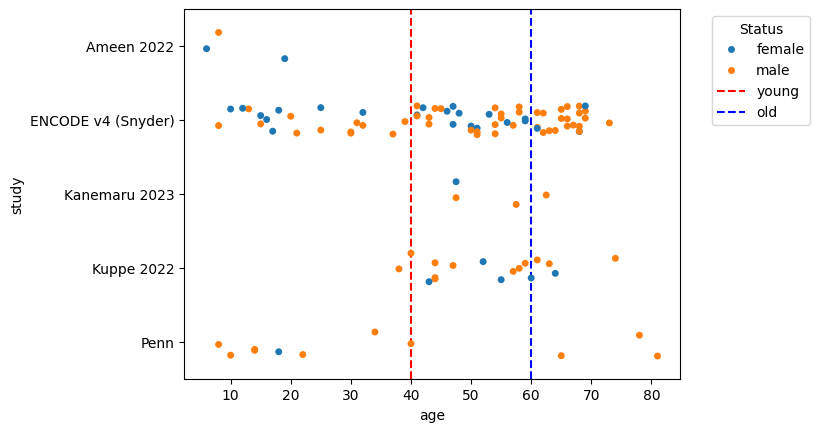

In [15]:
sns.stripplot(data = donor_level_metadata, x = 'age', y = 'study', hue = 'sex', jitter = 0.2)
plt.axvline(x=40, color='red', linestyle='--', label='young')
plt.axvline(x=60, color='blue', linestyle='--', label='old')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig(plots_dir + "snATAC_donor_stripplot.pdf")
plt.show()

2025-01-06 22:35:04 - INFO - maxp pruned
2025-01-06 22:35:04 - INFO - cmap pruned
2025-01-06 22:35:04 - INFO - kern dropped
2025-01-06 22:35:04 - INFO - post pruned
2025-01-06 22:35:04 - INFO - FFTM dropped
2025-01-06 22:35:04 - INFO - GPOS pruned
2025-01-06 22:35:04 - INFO - GSUB pruned
2025-01-06 22:35:04 - INFO - glyf pruned
2025-01-06 22:35:04 - INFO - Added gid0 to subset
2025-01-06 22:35:04 - INFO - Added first four glyphs to subset
2025-01-06 22:35:04 - INFO - Closing glyph list over 'MATH': 21 glyphs before
2025-01-06 22:35:04 - INFO - Glyph names: ['.notdef', '.null', 'C', 'a', 'e', 'eight', 'five', 'four', 'g', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'zero']
2025-01-06 22:35:04 - INFO - Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 38, 68, 72, 74, 81, 82, 87, 88]
2025-01-06 22:35:04 - INFO - Closed glyph list over 'MATH': 21 glyphs after
2025-01-06 22:35:04 - INFO - Glyph names: ['.notdef', '.null', 'C', 'a', 'e'

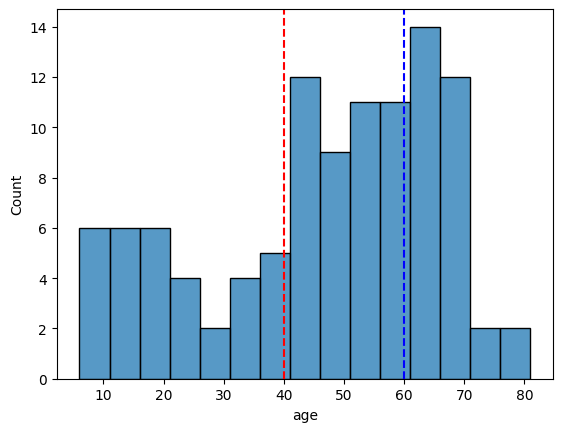

In [16]:
sns.histplot(data = donor_level_metadata, x = 'age', bins = 15)
plt.axvline(x=40, color='red', linestyle='--', label='young')
plt.axvline(x=60, color='blue', linestyle='--', label='old')
Counter(donor_level_metadata.age_group)
#plt.savefig(plots_dir + "snATAC_donor_age_histogram.pdf")
plt.show()

/mnt/data1/william/tmp/ipykernel_909539/2370937972.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  donors_by_sex = donor_level_metadata.groupby('sex').count()['age'].reset_index().rename(columns = {"age": "n"})
2025-01-06 22:35:05 - INFO - maxp pruned
2025-01-06 22:35:05 - INFO - cmap pruned
2025-01-06 22:35:05 - INFO - kern dropped
2025-01-06 22:35:05 - INFO - post pruned
2025-01-06 22:35:05 - INFO - FFTM dropped
2025-01-06 22:35:05 - INFO - GPOS pruned
2025-01-06 22:35:05 - INFO - GSUB pruned
2025-01-06 22:35:05 - INFO - glyf pruned
2025-01-06 22:35:05 - INFO - Added gid0 to subset
2025-01-06 22:35:05 - INFO - Added first four glyphs to subset
2025-01-06 22:35:05 - INFO - Closing glyph list over 'MATH': 28 glyphs before
2025-01-06 22:35:05 - INFO - Glyph names: ['.notdef', '.null', 'N', 'S',

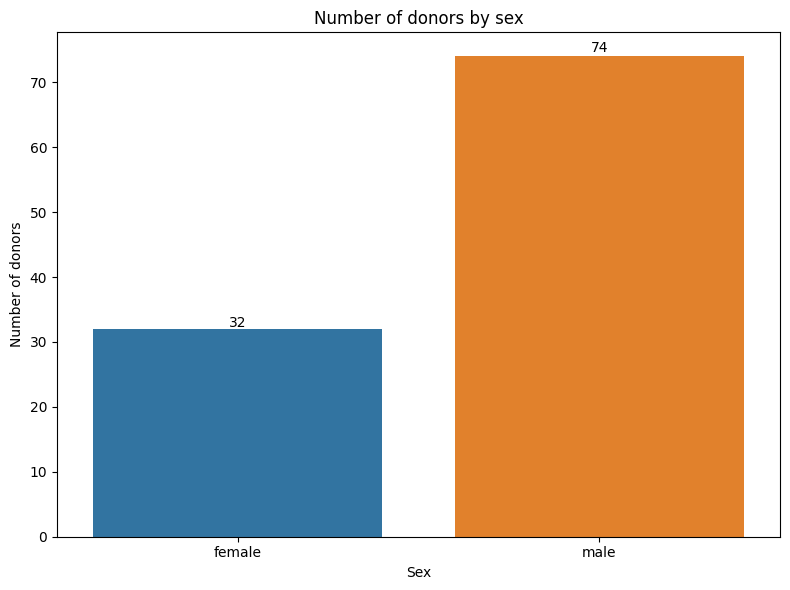

In [17]:
donors_by_sex = donor_level_metadata.groupby('sex').count()['age'].reset_index().rename(columns = {"age": "n"})

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create the vertical bar plot
sns.barplot(data=donors_by_sex, x='sex', y='n', hue='sex', dodge=False)

# Add the values on top of the bars
for index, value in enumerate(donors_by_sex['n']):
    plt.text(index, value * 1.01, str(value), ha='center')  # Adjusted to display values above the bars

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Number of donors')
plt.title('Number of donors by sex')

# Show the plot
plt.tight_layout()
#plt.savefig(plots_dir + "snATAC_donor_sex_barplot.pdf")
plt.show()

#### Save as csv file for ggplot 

In [18]:
donor_level_metadata.to_csv("01_ATAC_donor_metadata.csv")